In [1]:
import numpy as np
from scipy.linalg import lu
import matplotlib.pyplot as plt

In [17]:
''' LU decomposition without pivoting'''

def lu_decomp(A,n):
    u = np.array([row for row in A]);    # initializing : U = A
    l = np.eye(n)                        # initializing : L = identity
    
    for i in range(n-1):
        for j in range(i+1,n):
            l[j,i] = u[j,i]/u[i,i]       # multiplicative factor
            u[j,i:n] -= l[j,i]*u[i,i:n]  # subtrating rows
    
    return(l,u)

In [28]:
N = np.arange(5,21)    # N from 5 to 20 
frob1 = []             # To store frobenius norm, with partial pivoting
frob2 = []             # To store frobenius norm, without partial pivoting

''' LU decompositing with partial pivoting using inbuilt scipy function'''

for n in N:
    A = np.random.random((n,n))    # Generate uniform Random N*N matrix
    
    A = A - np.diag(np.diag(A)) + np.diag(np.ones((n,1))*0.001)
    
    '''
        LU decomposition with permulation 
        pl1      : permutation * lower triangular
        u1 , u2  : upper triangular
        l2       : lower triangular
    '''
    pl1,u1 = lu(A, permute_l = True) 
    l2,u2  = lu_decomp(A,n)
    
    
    LU1 = np.dot(pl1,u1)
    LU2 = np.dot(l2,u2)
    
    frob1.append(np.linalg.norm(LU1-A, ord='fro'))    # Frobenius Norm of LU-A, with partial pivoting
    frob2.append(np.linalg.norm(LU2-A, ord='fro'))    # Frobenius Norm of LU-A, without partial pivoting

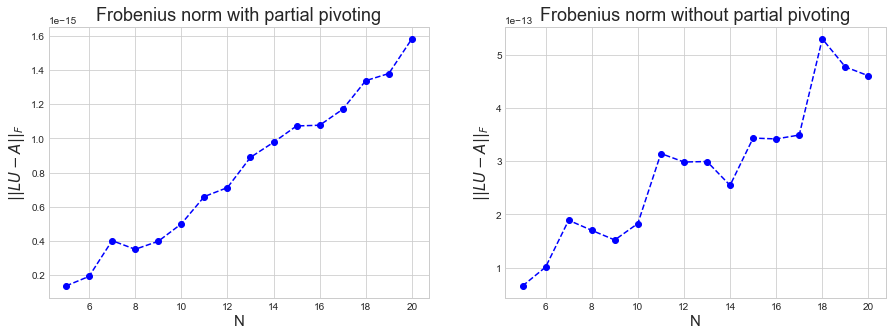

In [45]:
# plotting

fig = plt.figure(1,figsize=(15,5))
plt.style.use("seaborn-whitegrid")

plt.subplot(1,2,1)
plt.title('Frobenius norm with partial pivoting', size = 18)
plt.xlabel('N', size=15)
plt.ylabel("$||LU-A||_F$", size=15)
plt.plot(N,frob1,'bo--')

plt.subplot(1,2,2)
plt.title('Frobenius norm without partial pivoting', size = 18)
plt.xlabel('N', size=15)
plt.ylabel("$||LU-A||_F$", size=15)
plt.plot(N,frob2,'bo--')

plt.savefig("F-Norm1.jpg")
plt.show()

Notice axis scale

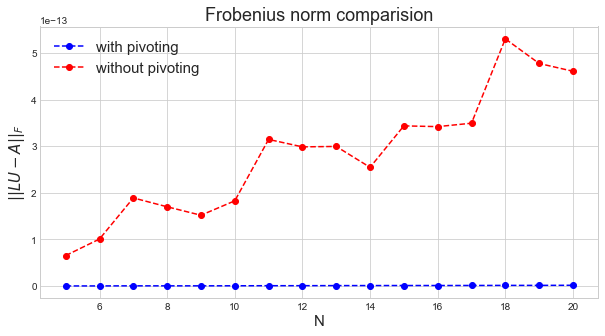

In [52]:
# comparision

fig = plt.figure(2,figsize=(10,5))
plt.style.use("seaborn-whitegrid")

plt.title('Frobenius norm comparision', size = 18)
plt.xlabel('N', size=15)
plt.ylabel("$||LU-A||_F$", size=15)
plt.plot(N,frob1,'bo--')
plt.plot(N,frob2,'ro--')
plt.legend(['with pivoting','without pivoting'], fontsize=15)

plt.savefig("F-Norm2.jpg")
plt.show()